# Logistic regression

https://www.analyticsvidhya.com/blog/2015/11/beginners-guide-on-logistic-regression-in-r

https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [3]:
# Previously linear regression is used to predict the continious data like stock price, wheather etc. Predicted value could be any number.
# but Logistic regression is used for solve simple classification problem or when data is categorical like spam email or not
#Customer would buy product or not , which party a person will going to vote for. Predicted value could be from defined categories
#Examples :- 
# 1) Passengers of titanic ship will survived or not.
# 2) If your car has not been serviced for quite a few years and wanted to know if this going to break down or not.
# X is year since service and Y is the probability of car breakdown.
#3) Survival rate of pateint.

#Logistic regression is a technique used for solve classification problem. There are type of classification such as 
# 1) Binary classification- Awnser would be yes/no or will customer buy life insurance or not
# 2) Multiclass classification - Which party a person going to vote like above example.

# In simple words, it predicts the probability of occurrence of an event by fitting data to a logit function.

#Sigmoid function - 1/1+(e)-y ... e is Euler's number ~2.71 ==== outcome will be less than one. y=mx+c. It has S curve or sigmoid curve
#Signmoid will convert input into range 0 to 1.

#Classification is for discreate value while regression is for continious value
# If we plot line as same as linear regression in logistic then resedule error will be very high.



Lets understand the Logistic Regression in simple words - In logistic regression, we are only concerned about the probability of outcome dependent variable

General linear equation - g(E(y)) = α + βx1 + γx2

 g(y) = βo + β(Age)   lets take one independent variable.
 
 p = exp(βo + β(Age)) - to make it positive or greater than 0.
 
 p  =  exp(βo + β(Age)) / (exp(βo + β(Age)) + 1)  - to make it less than one
 
 p = e^y/ 1 + e^y  -- refined equation  - (1)
 
 If p is the probability of success, 1-p will be the probability of failure which can be written as:
 
 q = 1 - p = 1 - (e^y/ 1 + e^y)  --where q is the probability of failure (2)
 
 on dividing 1 and 2 
 
 p/1-p = (e)y
 
 log(p/1-p) = y on taking log  and this is the logic equation.
 
 Logit Transformation is defined as follows-
Logit = Log (p/1-p) = log (probability of event happening/ probability of event not happening) = log (Odds)

we know accuracy can be misleading in the case of fraud detection. With highly imbalanced fraud data, 
the AUROC curve is a more reliable performance metric, used to compare different classifiers.

ROC Curve: Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs 
between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to 
assume p > 0.5 since we are more concerned about success rate. ROC summarizes the predictive power for all possible values 
of p > 0.5.  The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance 
metric for ROC curve. Higher the area under curve, better the prediction power of the model. Below is a sample ROC curve. 
The ROC of a perfect predictive model has TP equals 1 and FP equals 0. This curve will touch the top left corner of the 
graph.

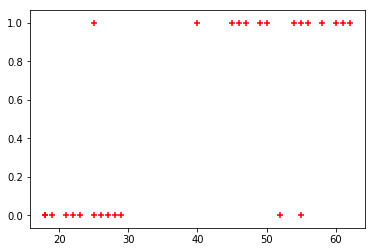

In [7]:
#https://medium.com/@fenjiro/data-mining-for-banking-loan-approval-use-case-e7c2bc3ece3

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("D://Work//Python//Python ML//ML//7_logistic_reg//insurance_data.csv")
df.head() 

plt.scatter(df.age,df.bought_insurance,color='Red', marker='+')

In [52]:
df.shape #(27, 2)

X_train,X_test,Y_train, Y_test=train_test_split(df[['age']],df.bought_insurance,test_size=.10, random_state=10)
X_train

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test) # 1
model.predict(X_test)  #array([1, 1, 0], dtype=int64)
X_test
model.predict_proba(X_test) # Probablity of buy a insurance

array([[0.20618565, 0.79381435],
       [0.24045662, 0.75954338],
       [0.6638168 , 0.3361832 ]])

In [ ]:
###################Exercise############################

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv("D://Work//Python//Python ML//ML//7_logistic_reg//Exercise//HR_comma_sep.csv")
df.head() 

df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [2]:
X_train, Y_train, X_test, Y_test = train_test_split(df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'Department', 'salary']], df.left, test_size=.10,random_state=10)

HR_model = LogisticRegression()
HR_model.fit(X_train,Y_train)

Text(69,0.5,'Truth')

<Figure size 432x288 with 0 Axes>

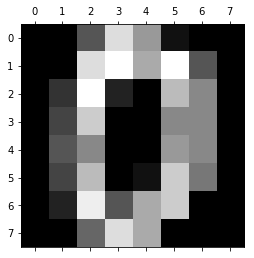

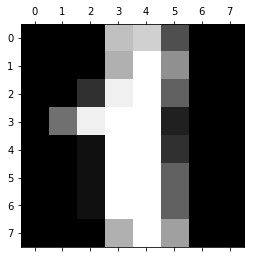

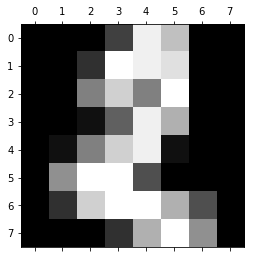

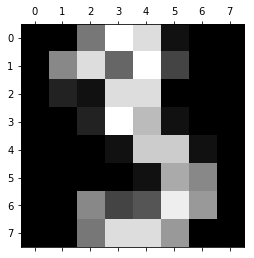

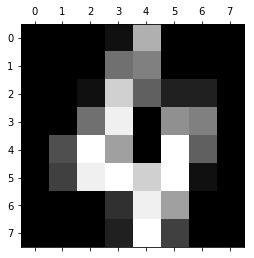

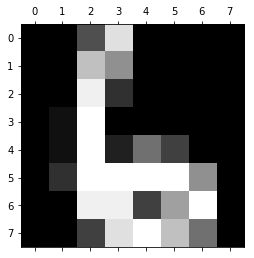

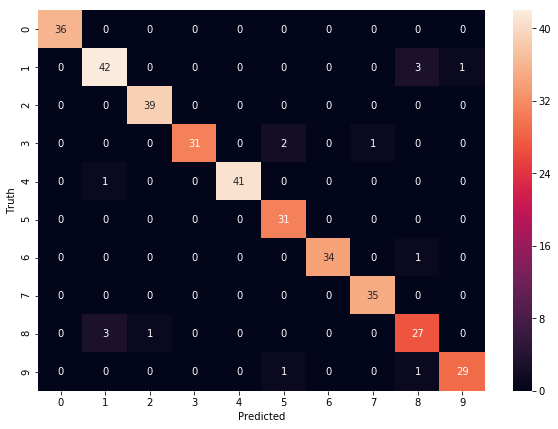

In [31]:
#################### Multiclass Classification ############################

# Project - Recognize the handwritten digits

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
dir(digits) #['DESCR', 'data', 'images', 'target', 'target_names']
digits.data[0] # Will give sample data

plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

digits.target[0:5] #array([0, 1, 2, 3, 4])

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(digits.data,digits.target, test_size=0.2)

len(X_train) #1437

from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
#y_train.shape
model.fit(X_train,Y_train)
model.score(X_test,Y_test) #0.9805555555555555

#Picking up random sample
plt.matshow(digits.images[67])
digits.target[67]

model.predict(digits.data[0:5]) #array([6])

y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_predicted)
cm

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
######################### Exercise ################################

In [ ]:
#Performace of a model 

#Precision is inversely propotional to recall.

#Fscore is (2*precision *recall)/precision +recall

#from sklearn.metrics import average_precision_score
#from sklearn.metrics import precisionn_recall_score

#Calculate the average precision and the PR curve
average_precision =average_precision_score(y_test, y_pred)

#Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test,y_pred)

#ROC curve - receiver operaring characterstic curve

#Its is curve between true positive rate(y Axis) and false postive rate(X axis)

#Obtain model probabilites 
probs=model.predict_prob(X_test)

#Print ROC curve using probabities
print(model.roc_auc_score(y_test,prob[:,1]))

#Confusion Matrix and Classification Report
from sklearn.matrix import classification_report, confusion_matrix

#Obtain Prediction
y_pred = model.predict(X_test)

#Print classification report using prediction

print(classification_report(y_test, y_pred)
      
#Print confusion matrix using prediction 
print(confusion_matrix(y_test, predicted))

In [ ]:
#The key difference between the two performance metrics, is that ROC curves will be the same no matter what the baseline 
#probability is. Precision and Recall may be more useful in practice for needle-in-haystack type problems, or problems 
#where the "positive" class is more interesting than the negative class.